# Assignment 2 - Single Cell RNA Sequencing (scRNA-Seq)
In class we learned about the methods through which scRNA-Seq data is quantified, as well as all of the potential pitfalls that arise when attempting to preprocess and analyze the data. Here, we'll delve into some current tools and methods for processing scRNA-Req data. 

We start by installing the necessary software:

In [1]:
!pip install --user magic-impute

    100% |████████████████████████████████| 1.8MB 6.5MB/s eta 0:00:011


Then, we'll import the necessary libraries:

In [2]:
import magic
import scprep

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

ModuleNotFoundError: No module named 'magic'

# Part I:  Visualizing Cell Trajectories with MAGIC (Markov Affinity-Based Graph Imputation of Cells)

#### First, we'll read in our data:


Data citation:  Paul, F., Arkin, Y., Giladi, A., Jaitin, D.A., Kenigsberg, E., Keren-Shaul, H., Winter, D., Lara-Astiaso, D., Gury, M., Weiner, A., et al. (2015). Transcriptional heterogeneity and lineage commitment in myeloid progenitors. Cell 163, 1663–1677.

In [96]:
emt_data = scprep.io.load_csv('assignment2_scRNA.csv.gz')
emt_data.head()

,0610007C21Rik;Apr3,0610007L01Rik,0610007P08Rik;Rad26l,0610007P14Rik,0610007P22Rik,0610008F07Rik,0610009B22Rik,0610009D07Rik,0610009O20Rik,0610010B08Rik;Gm14434;Gm14308,...,mTPK1;Tpk1,mimp3;Igf2bp3;AK045244,mszf84;Gm14288;Gm14435;Gm8898,mt-Nd4,mt3-mmp;Mmp16,rp9,scmh1;Scmh1,slc43a2;Slc43a2,tsec-1;Tex9,tspan-3;Tspan3
W31105,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
W31106,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
W31107,0,1,0,2,0,0,0,0,0,0,...,0,0,0,0,0,3,1,0,0,2
W31108,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,3,1,0,0,0
W31109,0,0,1,0,0,0,0,1,3,0,...,0,0,0,0,0,5,0,0,0,0


In [97]:
print(emt_data.shape)
Ncell, Ngene = emt_data.shape

(2730, 27297)


#### Problem 1a [3 pts]: Data QC
Next, we'll proceed by QCing our data. Remove all genes from the data that have very few counts over all samples and genes with a low library size. Decide on what thresholds to use.  

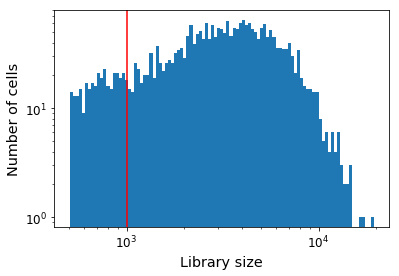

In [109]:
emt_data_f = scprep.filter.filter_empty_cells(emt_data)
emt_data_f = scprep.filter.filter_empty_genes(emt_data_f)
cutoff = 1000
scprep.plot.plot_library_size(emt_data_f, cutoff=cutoff)
emt_data_f = scprep.filter.filter_library_size(emt_data_f, cutoff=cutoff)
emt_data_f = scprep.filter.filter_rare_genes(emt_data_f, cutoff=1, min_cells=10)

#### Problem 1b [2 pts]: Normalization
Perform data normalization by taking the log transformation of your data (remember to add a pseudocount to avoid errors with zeros)

In [110]:
#YOUR CODE HERE
%timeit
#emt_data_clean_norm = emt_data_clean.applymap(lambda x: np.log2(x+1))
emt_data_norm = scprep.transform.log(emt_data_f, pseudocount=1, base=10)

In [111]:
emt_data_norm.head()

,0610007C21Rik;Apr3,0610007L01Rik,0610007P08Rik;Rad26l,0610007P14Rik,0610009D07Rik,0610009O20Rik,0610010K14Rik;Rnasek,0610011F06Rik,0610011L14Rik,0610012G03Rik,...,mKIAA1027;Tln1,mKIAA1076;AK140234,mKIAA1267;1700081L11Rik,mKIAA1575;Bcor,mKIAA1632;5430411K18Rik,mKIAA1994;Tsc22d1,rp9,scmh1;Scmh1,slc43a2;Slc43a2,tspan-3;Tspan3
W31106,0.0,0.00000,0.00000,0.301030,0.00000,0.00000,0.301030,0.0,0.00000,0.602060,...,0.477121,0.00000,0.00000,0.000000,0.0,0.000000,0.301030,0.30103,0.0,0.000000
W31107,0.0,0.30103,0.00000,0.477121,0.00000,0.00000,0.602060,0.0,0.00000,0.602060,...,0.698970,0.60206,0.30103,0.477121,0.0,0.477121,0.602060,0.30103,0.0,0.477121
W31108,0.0,0.30103,0.00000,0.301030,0.00000,0.00000,0.602060,0.0,0.00000,0.477121,...,0.845098,0.00000,0.30103,0.301030,0.0,0.000000,0.602060,0.30103,0.0,0.000000
W31109,0.0,0.00000,0.30103,0.000000,0.30103,0.60206,0.954243,0.0,0.30103,0.000000,...,0.845098,0.00000,0.00000,0.477121,0.0,0.778151,0.778151,0.00000,0.0,0.000000
W31110,0.0,0.30103,0.00000,0.000000,0.00000,0.30103,0.301030,0.0,0.00000,0.000000,...,0.778151,0.30103,0.00000,0.301030,0.0,0.000000,0.602060,0.00000,0.0,0.301030


#### Problem 1c [2 pts]: MAGIC 
Run MAGIC on the data. Visualize the cell trajectories using PCA. Are you satisfied with your choice of cutoffs? Why? If you are satisfied, rerun the QC and normalization to demonstrate thresholds that are not satisfactory. If not, retry these steps until you have a successful rerun that you are happy with.

Calculating MAGIC...
  Running MAGIC on 2416 cells and 7013 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.72 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.77 seconds.
    Calculating affinities...
    Calculated affinities in 0.10 seconds.
  Calculated graph and diffusion operator in 2.72 seconds.
  Calculating imputation...
    Automatically selected t = 7
  Calculated imputation in 0.19 seconds.
Calculated MAGIC in 3.29 seconds.


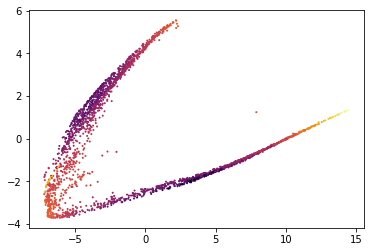

In [112]:
#YOUR CODE HERE
magic_operator = magic.MAGIC()
X_magic = magic_operator.fit_transform(emt_data_norm, genes="pca_only")
plt.scatter(X_magic["PC1"], X_magic["PC2"], c=X_magic["PC3"], s=1, cmap='inferno')
plt.show()

Calculating MAGIC...
  Running MAGIC on 2730 cells and 27297 genes.
  Calculating graph and diffusion operator...


/home/explorerwjy/.local/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


    Calculating PCA...
    Calculated PCA in 9.20 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.93 seconds.
    Calculating affinities...
    Calculated affinities in 0.14 seconds.
  Calculated graph and diffusion operator in 10.80 seconds.
  Calculating imputation...
    Automatically selected t = 7
  Calculated imputation in 0.27 seconds.
Calculated MAGIC in 13.05 seconds.


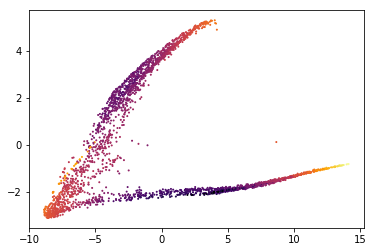

In [113]:
#emt_data_f = scprep.filter.filter_empty_cells(emt_data)
#emt_data_f = scprep.filter.filter_empty_genes(emt_data_f)
#emt_data_f = scprep.filter.filter_rare_genes(emt_data_f, cutoff=1, min_cells=50)
cutoff = 1
#scprep.plot.plot_library_size(emt_data_f, cutoff=cutoff)
#emt_data_f = scprep.filter.filter_library_size(emt_data_f, cutoff=cutoff)
emt_data_f = emt_data
emt_data_norm = scprep.transform.log(emt_data_f, pseudocount=1, base=10)
magic_operator = magic.MAGIC()
X_magic = magic_operator.fit_transform(emt_data_norm, genes="pca_only")
plt.scatter(X_magic["PC1"], X_magic["PC2"], c=X_magic["PC3"], s=1, cmap='inferno')
plt.show()

#### Problem 1d [15 pts]: Evaluating Test-Retest
Now, we will determine how MAGIC performs after we apply perturbations to the data. We will again look at the raw data. For each gene, resample (with replacement) all of the counts based on the empirical distribution of counts within the gene. Then, rerun 1a-c on the resampled data and compare using the visualizations. Assess the robustness of the algorithm by plotting the gene-gene relationship of KLF1 to MPO before and after perturbing the data. Repeat your perturbation process 5-10 more times. How does jiggering the data affect the gene-gene relationship?

In [114]:
#YOUR CODE HERE
emt_pert = pd.DataFrame()
for gene in emt_data.columns.values:
    vals = [v for v,p in emt_data[gene].value_counts().items()]
    fs = [p for v,p in emt_data[gene].value_counts().items()]
    total = sum(fs)
    ps = [float(p)/total for p in fs]
    emt_pert[gene] = np.random.choice(vals, emt_data.shape[0], p=ps)

In [115]:
emt_pert.head()
print(emt_data.shape[1], emt_pert.shape)

27297 (2730, 27297)


,0610007C21Rik;Apr3,0610007L01Rik,0610007P08Rik;Rad26l,0610007P14Rik,0610009D07Rik,0610009O20Rik,0610010K14Rik;Rnasek,0610011F06Rik,0610011L14Rik,0610012G03Rik,...,mKIAA1027;Tln1,mKIAA1076;AK140234,mKIAA1267;1700081L11Rik,mKIAA1575;Bcor,mKIAA1632;5430411K18Rik,mKIAA1994;Tsc22d1,rp9,scmh1;Scmh1,slc43a2;Slc43a2,tspan-3;Tspan3
0,0.0,0.30103,0.0,0.477121,0.0,0.000000,0.602060,0.00000,0.0,0.60206,...,0.000000,0.00000,0.30103,0.00000,0.00000,0.30103,0.477121,0.301030,0.30103,0.30103
1,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.301030,0.30103,0.0,0.00000,...,0.477121,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.00000,0.00000
2,0.0,0.00000,0.0,0.301030,0.0,0.000000,0.000000,0.00000,0.0,0.30103,...,0.845098,0.00000,0.00000,0.00000,0.30103,0.00000,0.698970,0.000000,0.00000,0.00000
3,0.0,0.00000,0.0,0.000000,0.0,0.477121,0.477121,0.00000,0.0,0.00000,...,0.301030,0.30103,0.00000,0.00000,0.00000,0.00000,0.477121,0.477121,0.00000,0.00000
4,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.30103,0.0,0.00000,...,0.000000,0.30103,0.00000,0.30103,0.00000,0.00000,0.000000,0.000000,0.00000,0.00000


Calculating MAGIC...
  Running MAGIC on 2730 cells and 7045 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 2.11 seconds.
    Calculating KNN search...
    Calculated KNN search in 1.18 seconds.
    Calculating affinities...
    Calculated affinities in 3.21 seconds.
  Calculated graph and diffusion operator in 6.82 seconds.
  Calculating imputation...
    Automatically selected t = 17
  Calculated imputation in 3.08 seconds.
Calculated MAGIC in 10.35 seconds.


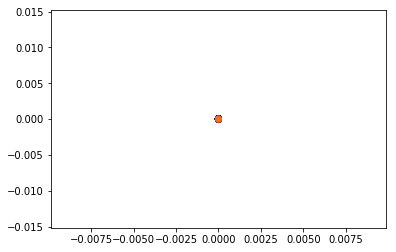

In [125]:
emt_pert_f = scprep.filter.filter_empty_cells(emt_pert)
emt_pert_f = scprep.filter.filter_empty_genes(emt_pert_f)
emt_pert_f = scprep.filter.filter_rare_genes(emt_pert_f, cutoff=1, min_cells=10)
cutoff = 1000
#scprep.plot.plot_library_size(emt_pert_f, cutoff=cutoff)
emt_pert_f = scprep.filter.filter_library_size(emt_pert_f, cutoff=cutoff)
#emt_pert_f = emt_pert
emt_pert_norm = scprep.transform.log(emt_pert_f, pseudocount=1, base=10)
display(emt_pert_norm.head())
magic_operator = magic.MAGIC()
X_magic = magic_operator.fit_transform(emt_pert_norm, genes="pca_only")

In [128]:
print("after resample the data, PCA reslult become a dot that all cells gathered. MAGIC can't work on fake data, means it has ability to detect cell type")

after resample the data, PCA reslult become a dot that all cells gathered. MAGIC can't work on fake data, means it has ability to detect cell type


# Part II: Exploring Additional scRNA-Seq Tools
Go to https://www.scrna-tools.org/ and select an additional toolkit of your choice to explore. Download/install the toolkit here. 

In [117]:
!pip install scanpy
import scanpy as sc

#### Problem 2a [5 pts]: Perform QC and Normalization on the previous data with this new toolkit. Visualize your preprocessed data

In [118]:
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
#sc.logging.print_versions()
#adata = scprep.io.load_csv('assignment2_scRNA.csv.gz')

In [119]:
#YOUR CODE HERE

adata = sc.read("assignment2_scRNA.csv.gz", cache=True)
adata = sc.pp.recipe_zheng17(adata, copy=True)
print(adata)
sc.tl.pca(adata, svd_solver='arpack')

sc.pp.neighbors(adata, n_neighbors=4, n_pcs=20)
sc.tl.draw_graph(adata)
#sc.pl.draw_graph(adata, color='paul15_clusters', legend_loc='on data')

... reading from cache file ./cache/assignment2_scRNA.h5ad
running recipe zheng17
filtered out 13087 genes that are detected in less than 1 counts
    finished (0:00:02.20)
AnnData object with n_obs × n_vars = 2730 × 999 
    obs: 'n_counts_all', 'n_counts'
    var: 'n_counts'
computing neighbors
    using 'X_pca' with n_pcs = 20
    finished (0:00:00.30) --> added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix
drawing single-cell graph using layout "fa"
    finished (0:00:12.28) --> added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm)


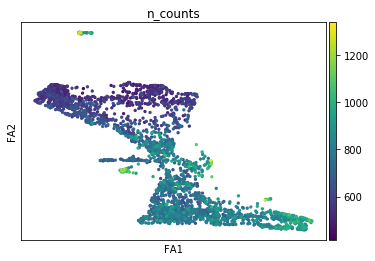

In [120]:
sc.pl.draw_graph(adata, color="n_counts", legend_loc='on data')

#### Problem 2b [5 pts]: Using the toolkit, stratify your data. 
This can by done by clustering, dimensionality reduction, or other means. Visualize your results

computing Diffusion Maps using n_comps=15(=n_dcs)
    eigenvalues of transition matrix
    [1.         1.         0.9986347  0.9943755  0.9908166  0.9906327
     0.98926824 0.98764056 0.984565   0.9825822  0.9822358  0.9812603
     0.97916377 0.9776001  0.9754649 ]
    finished (0:00:00.11) --> added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns)
computing neighbors
    finished (0:00:00.45) --> added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix
drawing single-cell graph using layout "fa"
    finished (0:00:11.43) --> added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm)


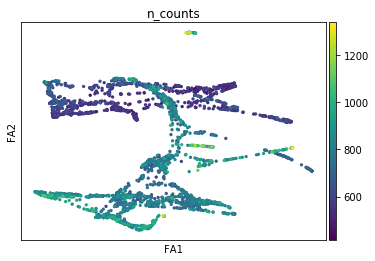

In [121]:
#YOUR CODE HERE
sc.tl.diffmap(adata)
sc.pp.neighbors(adata, n_neighbors=10, use_rep='X_diffmap')

sc.tl.draw_graph(adata)

sc.pl.draw_graph(adata, color="n_counts", legend_loc='on data')

#### Problem 2c [5 pts]: Compare the stratification results between MAGIC and the toolkit in part 2. 
List an analysis result from your toolkit that is similar or one that is distinct from  MAGIC. 